In [1]:
# Importing libraies into notebook

import pandas as pd
import numpy as np
import os
import seaborn as sns



In [2]:
# importing py files into notebook
import env

from env import host, user, password
from env import get_db_url

#import acquire

### Acquire  Telco customer data from

In [18]:
 # Creating query 
 sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """

In [19]:
# Pulling data from 
df = pd.read_sql(sql_query, get_db_url('telco_churn'))


### Preparing and  cleaning the data

Print Dataframe information and get some insight of the data

In [21]:
# To Show all columns in dataframe
pd.set_option('display.max_columns', None)

In [22]:
# Show dataframe info and snapshot of dataframe#
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [24]:
df.shape

(7043, 24)

There are no null values. 

There are columns that have relationships, columns that multiple have variables that need to be embarked. 

Convert 'total_charges' into a float. The raw shape of the dataframe is 7043 rows and 24 columns.

In [ ]:
pd.crosstab(df['payment_type_id'], df['payment_type'])

In [ ]:
pd.crosstab(df['internet_service_type_id'], df['internet_service_type'])

In [ ]:
pd.crosstab(df['contract_type_id'], df['contract_type'])

After crosstabbing the corresponding columns and reviewing the data. I will drop columns ' contract_type_id', 'internet_service_type_id', 'payment_type_id', and 'customer_id'

In [25]:
# prior to editing the data frame, I will save the raw dataframe to a function just in case I mess up while coding

telco_raw = pd.read_sql(sql_query, get_db_url('telco_churn'))

In [26]:
# Drop columns
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])

In [27]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [28]:
# remove any white space
df['total_charges'] = df['total_charges'].str.strip()

In [29]:
# verification white space is removed from total charges
df = df[df.total_charges != '']
df.shape

(7032, 20)

In [30]:
# verification of raw data set having white space
telco_raw[telco_raw.total_charges == ''].shape

(0, 24)

In [31]:
# Convert total charges data type to a float

df['total_charges'] = df.total_charges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   senior_citizen         7032 non-null   int64  
 2   partner                7032 non-null   object 
 3   dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   phone_service          7032 non-null   object 
 6   multiple_lines         7032 non-null   object 
 7   online_security        7032 non-null   object 
 8   online_backup          7032 non-null   object 
 9   device_protection      7032 non-null   object 
 10  tech_support           7032 non-null   object 
 11  streaming_tv           7032 non-null   object 
 12  streaming_movies       7032 non-null   object 
 13  paperless_billing      7032 non-null   object 
 14  monthly_charges        7032 non-null   float64
 15  tota

In [ ]:
# printing value counts for each column
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

In [33]:
# encode the coresponding columns
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
df['multiple_lines_encoded'] = df.multiple_lines.map({'Yes': 1, 'No': 0, 'No phone service': 2})
df['online_security_encoded'] = df.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['online_backup_encoded'] = df.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['device_protection_encoded'] = df.device_protection.map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['tech_support_encoded'] = df.tech_support.map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['streaming_tv_encoded'] = df.streaming_tv.map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['streaming_movies_encoded'] = df.streaming_movies.map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['contract_type_encoded'] = df.contract_type.map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})
df['internet_service_type_encoded'] = df.internet_service_type.map({'Fiber optic': 1, 'DSL': 0, 'None': 2})
df['payment_type_encoded'] = df.payment_type.map({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [71]:
print(df.shape)
df.head()

(7032, 36)


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_encoded,online_security_encoded,online_backup_encoded,device_protection_encoded,tech_support_encoded,streaming_tv_encoded,streaming_movies_encoded,contract_type_encoded,internet_service_type_encoded,payment_type_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,0


### Encode columns

In [37]:
pd.crosstab(df['gender'], df['gender_encoded'])

gender_encoded,0,1
gender,,
Female,0,3483
Male,3549,0


In [38]:
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [39]:
pd.crosstab(df['partner'], df['partner_encoded'])

partner_encoded,0,1
partner,,
No,3639,0
Yes,0,3393


In [40]:
df.partner.value_counts()

No     3639
Yes    3393
Name: partner, dtype: int64

In [41]:
pd.crosstab(df['dependents'], df['dependents_encoded'])

dependents_encoded,0,1
dependents,,
No,4933,0
Yes,0,2099


In [42]:
df.dependents.value_counts()

No     4933
Yes    2099
Name: dependents, dtype: int64

In [43]:
pd.crosstab(df['phone_service'], df['phone_service_encoded'])

phone_service_encoded,0,1
phone_service,,
No,680,0
Yes,0,6352


In [44]:
df.phone_service.value_counts()

Yes    6352
No      680
Name: phone_service, dtype: int64

In [45]:
pd.crosstab(df['paperless_billing'], df['paperless_billing_encoded'])

paperless_billing_encoded,0,1
paperless_billing,,
No,2864,0
Yes,0,4168


In [46]:
df.paperless_billing.value_counts()

Yes    4168
No     2864
Name: paperless_billing, dtype: int64

In [47]:
pd.crosstab(df['churn'], df['churn_encoded'])

churn_encoded,0,1
churn,,
No,5163,0
Yes,0,1869


In [48]:
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [50]:
pd.crosstab(df['multiple_lines'], df['multiple_lines_encoded'])

multiple_lines_encoded,0,1,2
multiple_lines,,,
No,3385,0,0
No phone service,0,0,680
Yes,0,2967,0


In [51]:
df.multiple_lines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64

In [52]:
pd.crosstab(df['online_security'], df['online_security_encoded'])

online_security_encoded,0,1,2
online_security,,,
No,3497,0,0
No internet service,0,0,1520
Yes,0,2015,0


In [53]:
df.online_security.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64

In [54]:
pd.crosstab(df['online_backup'], df['online_backup_encoded'])

online_backup_encoded,0,1,2
online_backup,,,
No,3087,0,0
No internet service,0,0,1520
Yes,0,2425,0


In [55]:
df.online_backup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64

In [56]:
pd.crosstab(df['device_protection'], df['device_protection_encoded'])

device_protection_encoded,0,1,2
device_protection,,,
No,3094,0,0
No internet service,0,0,1520
Yes,0,2418,0


In [57]:
df.device_protection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64

In [58]:
pd.crosstab(df['tech_support'], df['tech_support_encoded'])

tech_support_encoded,0,1,2
tech_support,,,
No,3472,0,0
No internet service,0,0,1520
Yes,0,2040,0


In [59]:
df.tech_support.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64

In [60]:
pd.crosstab(df['streaming_tv'], df['streaming_tv_encoded'])

streaming_tv_encoded,0,1,2
streaming_tv,,,
No,2809,0,0
No internet service,0,0,1520
Yes,0,2703,0


In [61]:
df.streaming_tv.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: streaming_tv, dtype: int64

In [62]:
pd.crosstab(df['streaming_movies'], df['streaming_movies_encoded'])

streaming_movies_encoded,0,1,2
streaming_movies,,,
No,2781,0,0
No internet service,0,0,1520
Yes,0,2731,0


In [63]:
df.streaming_movies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: streaming_movies, dtype: int64

In [64]:
pd.crosstab(df['contract_type'], df['contract_type_encoded'])

contract_type_encoded,0,1,2
contract_type,,,
Month-to-month,3875,0,0
One year,0,1472,0
Two year,0,0,1685


In [65]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: contract_type, dtype: int64

In [68]:
pd.crosstab(df['internet_service_type'], df['internet_service_type_encoded'])

internet_service_type_encoded,0,1,2
internet_service_type,,,
DSL,2416,0,0
Fiber optic,0,3096,0
None,0,0,1520


In [69]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

In [66]:
pd.crosstab(df['payment_type'], df['payment_type_encoded'])

payment_type_encoded,0,1,2,3
payment_type,,,,
Bank transfer (automatic),0,0,1542,0
Credit card (automatic),0,0,0,1521
Electronic check,0,2365,0,0
Mailed check,1604,0,0,0


In [67]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_type, dtype: int64

### Drop columns encoded

In [ ]:
df = df.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup' ,'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type' ])

### create function to prep and clean data

In [70]:
def prep_telco_encoded():

    df = acquire.get_telco_data()
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype(float)
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    df['multiple_lines_encoded'] = df.multiple_lines.map({'Yes': 1, 'No': 0, 'No phone service': 2})
    df['online_security_encoded'] = df.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 2})
    df['online_backup_encoded'] = df.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 2})
    df['device_protection_encoded'] = df.device_protection.map({'Yes': 1, 'No': 0, 'No internet service': 2})
    df['tech_support_encoded'] = df.tech_support.map({'Yes': 1, 'No': 0, 'No internet service': 2})
    df['streaming_tv_encoded'] = df.streaming_tv.map({'Yes': 1, 'No': 0, 'No internet service': 2})
    df['streaming_movies_encoded'] = df.streaming_movies.map({'Yes': 1, 'No': 0, 'No internet service': 2})
    df['contract_type_encoded'] = df.contract_type.map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})
    df['internet_service_type_encoded'] = df.internet_service_type.map({'Fiber optic': 1, 'DSL': 0, 'None': 2})
    df['payment_type_encoded'] = df.payment_type.map({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
    df.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type' ], inplace=True)
    return df






### create dataframe dummies

In [ ]:
# Create dummies for columns
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)   

In [ ]:
dummy_df

In [ ]:
 # Merging dataframe with dummy dataframe
 df = pd.concat([df, dummy_df], axis=1)
 df.head()

NameError: name 'dummy_df' is not defined

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
def prep_telco():
    df = acquire.get_telco_data()
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype(float)
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)   
    df = pd.concat([df, dummy_df], axis=1)
    return df

### Split dataframe into train, validate and test data sets

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
telco_train, telco_test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn_encoded )
telco_train, telco_validate = train_test_split(telco_train, test_size=.3, random_state=123, stratify=telco_train.churn_encoded)

print(telco_train.shape)
print(telco_validate.shape)
print(telco_test.shape)

(3937, 20)
(1688, 20)
(1407, 20)


# Making Models

### Random Forest

**What is a Random Forest?**

Random Forest is a type Ensemble Machine Learning algorithm called Bootstrap Aggregation or bagging.

**How does it work?**

**Bootstrapping** is a statistical method for estimating a quantity from a data sample, e.g. mean. You take lots of samples of your data, calculate the mean, then average all of your mean values to give you a better estimation of the true mean value. In bagging, the same approach is used for estimating entire statistical models, such as decision trees. Multiple samples of your training data are taken and models are constructed for each sample set. When you need to make a prediction for new data, each model makes a prediction and the **predictions are averaged** to give a better estimate of the true output value.

Random forest is a tweak on this approach where decision trees are created so that rather than selecting optimal split points, suboptimal splits are made by introducing randomness. The models created for each sample of the data are therefore more different than they otherwise would be, but still accurate in their unique and different ways. Combining their predictions results in a better estimate of the true underlying output value.

**Pros**

Reduction in over-fitting

More accurate than decision trees in most cases

Naturally performs feature selection

**Cons**

Slow real time prediction

Difficult to implement

Complex algorithm so difficult to explain

In [18]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
# create X & y version of train, where y is a series with just the churned_encoded variable and X are all the features. 

X_train = telco_train.drop(columns=["churn_encoded"])
y_train = telco_train.churn_encoded

X_validate = telco_validate.drop(columns=["churn_encoded"])
y_validate = telco_validate.churn_encoded

X_test = telco_test.drop(columns=["churn_encoded"])
y_test = telco_test.churn_encoded

In [23]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,multiple_lines_encoded,online_security_encoded,online_backup_encoded,device_protection_encoded,tech_support_encoded,streaming_tv_encoded,streaming_movies_encoded,contract_type_encoded,internet_service_type_encoded,payment_type_encoded
5919,0,58,71.10,4299.20,1,0,0,1,1,1,1,1,1,1,0,0,1,0,3
1915,0,71,85.45,6028.95,0,0,1,1,1,1,1,1,0,0,0,0,1,1,3
5054,0,35,25.75,882.55,1,1,1,1,1,1,2,2,2,2,2,2,0,2,1
2355,0,1,19.20,19.20,0,1,1,1,0,0,2,2,2,2,2,2,0,2,0
6279,1,20,54.00,1055.90,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [41]:
#  mode for target?

y_train.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [79]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.73


In [80]:
# Create the object
rf = RandomForestClassifier(max_depth=3, random_state=123)
rf

RandomForestClassifier(max_depth=3, random_state=123)

#### Fit the model

Fit the randomn forest algorithm into training data

In [81]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

#### Feature Importance

Evaluate importance, or weight of each feature.

In [28]:
print(rf.feature_importances_)


[4.37199113e-03 1.72777664e-01 5.90537806e-02 8.50743761e-02
 3.97833424e-05 7.17217794e-04 3.61032841e-03 5.33267919e-04
 6.01877170e-03 1.24972324e-03 1.64590186e-01 3.86444360e-02
 3.25253029e-02 1.22575050e-01 1.27147387e-02 2.30499006e-02
 2.17344468e-01 4.42779746e-02 1.08310394e-02]


**The higher number the feature importance == more important the feature.**

**The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.**

In [78]:
pd.concat([pd.DataFrame(X_train.columns).rename(columns={0: 'column'}), pd.DataFrame(rf.feature_importances_).rename(columns={ 0: 'importance'})], axis=1).sort_values(by=['importance'], ascending=False)

,column,importance
16,contract_type_encoded,0.217344
1,tenure,0.172778
10,online_security_encoded,0.164590
13,tech_support_encoded,0.122575
3,total_charges,0.085074
2,monthly_charges,0.059054
17,internet_service_type_encoded,0.044278
11,online_backup_encoded,0.038644
12,device_protection_encoded,0.032525
15,streaming_movies_encoded,0.023050


#### Make Predictions

Classify each customer by their possibility to churn.

In [82]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Estimate Probabilty 

Estimate the probability of each customer, using the training data.

In [83]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.90650866, 0.09349134],
       [0.85144865, 0.14855135],
       [0.88202545, 0.11797455],
       ...,
       [0.96373381, 0.03626619],
       [0.60934957, 0.39065043],
       [0.8217739 , 0.1782261 ]])

In [84]:
# data frame with prediction and probability

rf1 =pd.concat([pd.DataFrame(y_pred).rename(columns={0: 'prediction'}), pd.DataFrame(y_pred_proba).rename(columns={ 0: 'no probability', 1: 'yes probability'})], axis=1)


#### Evalaute the model

Compute the Accuracy

In [33]:
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


#### Create a confusion matrix



In [34]:
print(confusion_matrix(y_train, y_pred))


[[2711  180]
 [ 593  453]]


#### 

Create a classificaiton report

Precision: 
T
P
(
T
P
+
F
P
)

Recall: 
T
P
(
T
P
+
F
N
)

F1-Score: A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.

F1 
∈
[
0
,
1
]

F1-score = harmonic mean = 
2
1
p
r
e
c
i
s
i
o
n
+
1
r
e
c
a
l
l

Support: number of occurrences of each class.

$\frac{\frac{x}{1}}{x - y}$	

In [36]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2891
           1       0.72      0.43      0.54      1046

    accuracy                           0.80      3937
   macro avg       0.77      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



#### Validate Model
**Evaluate on Out-of-Sample data**

Compute the accuracy of the model when run on the validate dataset.

In [37]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.78


In [46]:
# Loop running model to 
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.787029     0.724138  0.780544     0.755584      0.770320
recall        0.961259     0.281071  0.780544     0.621165      0.780544
f1-score      0.865462     0.404959  0.780544     0.635211      0.743114
support    2891.000000  1046.000000  0.780544  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.820521     0.715640  0.803658     0.768080      0.792655
recall        0.937738     0.433078  0.803658     0.685408      0.803658
f1-score      0.875222     0.539607  0.803658     0.707414      0.786054
support    2891.000000  1046.000000  0.803658  3937.000000   3937.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.823047     0.716049  0.805436     0.769548      0.794619
recall        0.936354     0.443595  0.805436  

### K-Nearest Neighbor

**What is KNN?**

Supervised Algorithm

Makes predictions based on how close a new data point is to known data points.

Considered a **lazy algorithm** in that it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression problems, this might be the mean output variable. For classification problems this might be the mode (or most common) class value.

It is important to define a metric to measure how similar data instances are. Euclidean distance can be used if attributes are all on the same scale (or you convert them to the same scale).

**Pros**

Simple to implement

Robust to noisy training data

Effective if training data is large

Performs calculations "just in time", i.e. when a prediction is needed (as opposed to ahead of time)

Training instances can be updated and curated over time to keep predictions accurate.

**Cons**

Need to determine the value of K

The computation cost is high as it needs to compute the distance of each instance to all the training samples...you need to hang on to your entire training dataset.

Distance can break down in very high dimensions, negatively affecting the performance. This is know as the "Curse of dimensionality". To alleviate, only use those input variables that are most relevant to predicting the output variable.

In [47]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Create KNN Object



In [85]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


Fit the model

In [86]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

Make Predictions

Classify each customer by its estimated churn.

In [87]:
# make predictions
y_pred = knn.predict(X_train)


In [88]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [89]:
y_train[:5]

5919    0
1915    0
5054    0
2355    0
6279    0
Name: churn_encoded, dtype: int64

In [90]:
# Estimate probability
y_pred_proba = knn.predict_proba(X_train)

In [92]:
knn_prob = pd.concat([pd.DataFrame(y_pred).rename(columns={0: 'prediction'}), pd.DataFrame(y_pred_proba).rename(columns={ 0: 'no probability', 1: 'yes probability'})], axis=1)
knn_prob

,prediction,no probability,yes probability
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,0,0.6,0.4
4,0,0.8,0.2
...,...,...,...
3932,0,0.6,0.4
3933,1,0.4,0.6
3934,0,1.0,0.0
3935,0,0.8,0.2


In [51]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
churn_encoded,,
0,2667,224
1,442,604


In [52]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.857832,0.729469,0.830836,0.793650,0.823728
recall,0.922518,0.577438,0.830836,0.749978,0.830836
f1-score,0.889000,0.644610,0.830836,0.766805,0.824069
support,2891.000000,1046.000000,0.830836,3937.000000,3937.000000


In [56]:
metrics = []

# loop through different values of k
for k in range(1, 30):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)
results



,k,train_accuracy,validate_accuracy
0,1,0.997968,0.702014
1,2,0.861316,0.749408
2,3,0.857760,0.741706
3,4,0.833630,0.764218
4,5,0.830836,0.761256
5,6,0.819914,0.769550
6,7,0.819660,0.773697
7,8,0.812802,0.781398
8,9,0.815596,0.777251
9,10,0.811532,0.773697


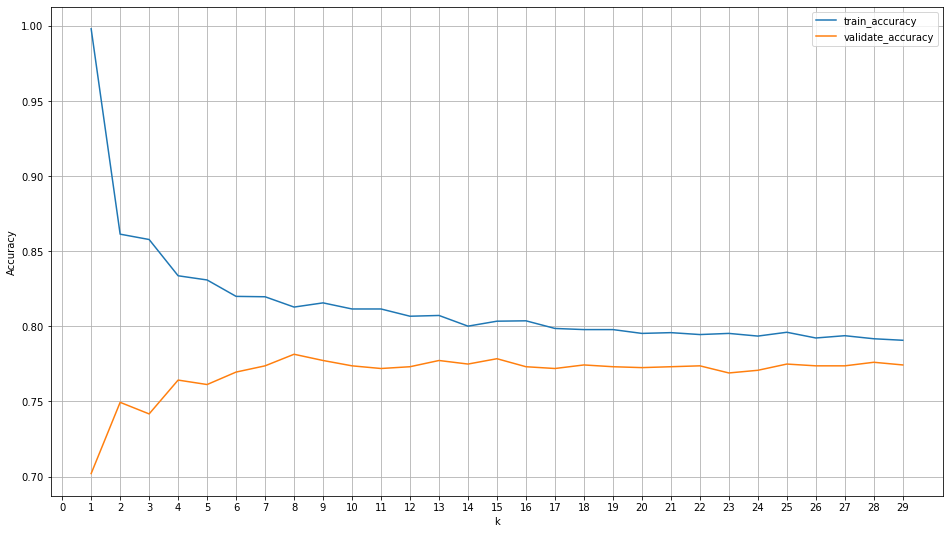

In [58]:
# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,30,1))
plt.grid()

### Decision Tree

**What are Decision Trees?**

Remember that classification is a **supervised** machine learning process. That means we train on labeled data.

In Decision Trees, we use the training data to train the tree to find a decision boundary to use as a **decision rule** for future data.

Decision trees are like playing "20 Questions" with your features used to predict the target. Each question is a "Yes" or a "No". That number of questions is the **depth of your tree**.

Given enough depth, decision trees are **overfitting** machines.

**About Decision Trees**

A sequence of rules that can be used to classify 2 or more classes

Each node represents a single input variable (x) and a split point or class of that variable

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Predictions are made by walking the splits of the tree until arriving at a leaf node and output the class value at that leaf node.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [60]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [61]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

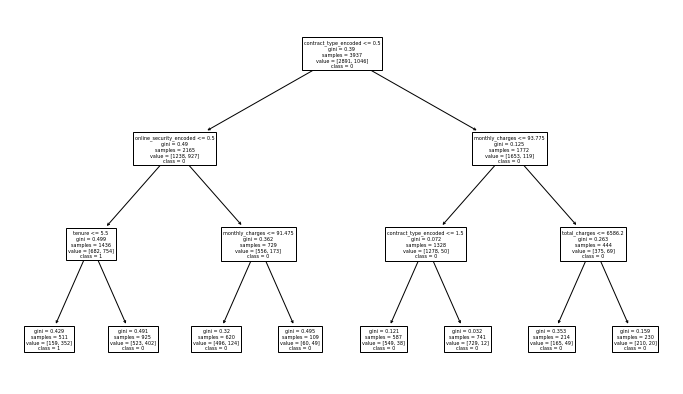

In [62]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [63]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.78


In [65]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.797431,0.688845,0.783338,0.743138,0.768582
recall,0.945002,0.336520,0.783338,0.640761,0.783338
f1-score,0.864968,0.452152,0.783338,0.658560,0.755289
support,2891.000000,1046.000000,0.783338,3937.000000,3937.000000


In [67]:

# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.883247     0.525070  0.752604     0.704158      0.788085
recall        0.764095     0.720841  0.752604     0.742468      0.752604
f1-score      0.819362     0.607575  0.752604     0.713468      0.763093
support    2891.000000  1046.000000  0.752604  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.797431     0.688845  0.783338     0.743138      0.768582
recall        0.945002     0.336520  0.783338     0.640761      0.783338

In [69]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.752604,0.719194,0.033409
2,3,0.783338,0.764810,0.018527
3,4,0.792990,0.761848,0.031141
4,5,0.810770,0.783175,0.027594
5,6,0.817120,0.774882,0.042238
6,7,0.834392,0.774289,0.060103
7,8,0.851918,0.763033,0.088885
8,9,0.869952,0.750000,0.119952
9,10,0.894844,0.758886,0.135958


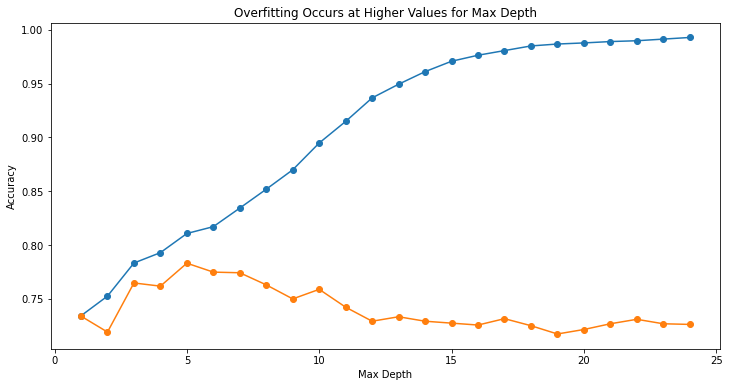

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [71]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.810770,0.783175,0.027594
5,6,0.817120,0.774882,0.042238
6,7,0.834392,0.774289,0.060103
2,3,0.783338,0.764810,0.018527
7,8,0.851918,0.763033,0.088885
3,4,0.792990,0.761848,0.031141
0,1,0.734315,0.734005,0.000311
1,2,0.752604,0.719194,0.033409


# how to merge dataframe with customer id

In [ ]:
customer = telco_raw['customer_id']

In [ ]:
cust_merge = pd.concat([customer, X_train], axis=1)
cust_merge

### Testing my user created functions in workbook. Reset the notebook.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import env

from env import host, user, password

import acquire

In [4]:
df = acquire.new_telco_data()

'Use this function to get new data which saves to csv file on local database'
df = acquire.get_telco_data()

In [7]:
import prepare
from pandas import DataFrame
import pandas as pd


In [8]:
df = prepare.prep_telco_encoded()

In [9]:
df.head(1)

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_encoded,online_security_encoded,online_backup_encoded,device_protection_encoded,tech_support_encoded,streaming_tv_encoded,streaming_movies_encoded,contract_type_encoded,internet_service_type_encoded,payment_type_encoded
0,0,9,65.6,593.3,1,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0


# DELETE CODE IF NOT WORKING

X_train = telco_train.drop(columns=["churn_encoded"])
y_train = telco_train.churn_encoded

X_validate = telco_validate.drop(columns=["churn_encoded"])
y_validate = telco_validate.churn_encoded

X_test = telco_test.drop(columns=["churn_encoded"])
y_test = telco_test.churn_encoded